# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [4]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [5]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Guayaquil'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Agregar la solucion en markdown (Informe)
n=4
d=16
b=?
n=(b^(d+1)-1)/(b-1) 
b=n/d 
b=4/16 
b=0.25

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

['Casa', 'Sub Centro Sayausi']


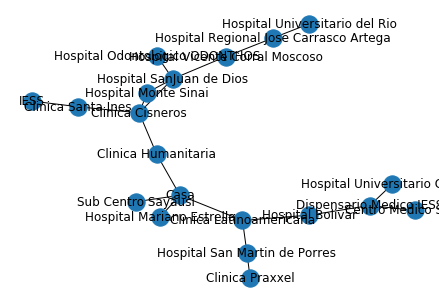

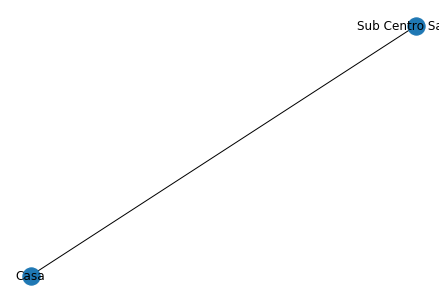

In [6]:
# Implementar
def bucar_amplitud(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Casa': {'Sub Centro Sayausi', 'Clinica Humanitaria', 'Clinica Latinoamericana', 'Hospital Mariano Estrella'},
        'Sub Centro Sayausi': {'Casa'},
        'Clinica Humanitaria': {'Casa', 'Clinica Cisneros'},
        'Clinica Latinoamericana': {'Hospital San Martin de Porres', 'Hospital Bolivar'},
        'Hospital Mariano Estrella': {'Casa'},
        'Clinica Cisneros': {'Clinica Humanitaria', 'Hospital Monte Sinai', 'Clinica Santa Ines'},
        'Hospital Monte Sinai': {'Clinica Cisneros', 'Hospital SanJuan de Dios'},
        'Clinica Santa Ines': {'Clinica Cisneros', 'IESS'},
        'Hospital Bolivar': {'Dispensario Medico IESS', 'Clinica Latinoamericana'},
        'Hospital San Martin de Porres': {'Clinica Latinoamericana', 'Clinica Praxxel'},
        'Hospital SanJuan de Dios': {'Hospital Monte Sinai', 'Clinica Cisneros'},
        'Dispensario Medico IESS': {'Hospital Bolivar', 'Centro Medico SanBlas'},
        'Clinica Praxxel': {'Hospital San Martin de Porres'},
        'Hospital Odontologico ODONTHOS': {'Hospital SanJuan de Dios'},
        'Centro Medico SanBlas': {'Dispensario Medico IESS'},
        'Hospital Universitario Catolico': {'Dispensario Medico IESS'},
        'Hospital Vicente Corral Moscoso': {'Hospital SanJuan de Dios'},
        'IESS': {'Clinica Santa Ines'},
        'Hospital Regional Jose Carrasco Artega': {'Hospital Vicente Corral Moscoso'},
        'Hospital Universitario del Rio': {'Hospital Regional Jose Carrasco Artega'}
    }

    init_state = 'Casa'
    solution = 'Sub Centro Sayausi'
    solution_node = bucar_amplitud(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None:
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay :)")
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G1 = nx.Graph()
G1.add_nodes_from(connections)
for edge, lista in connections.items():
    for i in lista:
        G1.add_edge(edge, i)

nx.draw(G1,  with_labels = True)
plt.show()

G2 = nx.Graph()
G2.add_node(init_state)
G2.add_node(solution)
G2.add_edge(init_state, solution)
nx.draw(G2,  with_labels = True)
plt.show()

# Conclusiones

In [ ]:
Este metodo nos permite buscar el mejor camino para llegar ala solucion mas rapida.